<a href="https://colab.research.google.com/github/KamisiT/Medical_cost_Analysis-Pointbreak/blob/main/ML_Bootcamp_project_Medical_cost_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
dataset = pd.read_csv('/content/insurance.csv')
df = dataset.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [195]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


DISTRIBUTION OF BMI(BODY MASS INDEX)

---



In [196]:
#Checking for non-numeric values
bmi = df['bmi']
bmi.isna().value_counts()

False    1338
Name: bmi, dtype: int64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Computing the average bmi
bmi_mean = np.mean(bmi)
print(f'The average bmi is: {bmi_mean}')

The average bmi is: 30.66339686098655


In [ ]:
#Checking the minimum and maximum values
min_bmi = min(bmi)
max_bmi = max(bmi)
print(f'The lowest bmi recorded is: {min_bmi} \nThe highest bmi recorded is: {max_bmi}')

The lowest bmi recorded is: 15.96 
The highest bmi recorded is: 53.13


In [ ]:
#Computing the standard deviation of the bmi
std_dev_bmi = np.std(bmi)
print(f'The standard deviation of the bmi distribution is: {std_dev_bmi} ')

The standard deviation of the bmi distribution is: 6.0959076415894256 


RELATIONSHIP BETWEEN SMOKER AND CHARGES

---



In [197]:
smoker = df['smoker']
charges = df['charges']

In [ ]:
smoker_charges = pd.concat([smoker, charges], axis=1)

In [ ]:
smoker_charges.head()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


In [ ]:
mean_charge = np.mean(charges)
print(f'The average charge is: {mean_charge}')

The average charge is: 13270.422265141257


Text(0.5, 1.0, 'Relationship between smoker and charges')

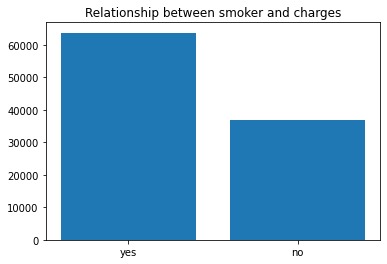

In [ ]:
plt.bar(smoker, charges)
plt.title('Relationship between smoker and charges')

RELATIONSHIP BETWEEN SMOKER AND REGION

---



In [198]:
region = df['region']
smoker_region = pd.concat([smoker, region], axis=1)

In [ ]:
new_smoker_region = pd.DataFrame(smoker_region.value_counts())
new_smoker_region = new_smoker_region.rename(columns={0:'distribution'},)
new_smoker_region.reset_index(inplace=True)
new_smoker_region

,smoker,region,distribution
0,no,southeast,273
1,no,northwest,267
2,no,southwest,267
3,no,northeast,257
4,yes,southeast,91
5,yes,northeast,67
6,yes,northwest,58
7,yes,southwest,58


Text(0.5, 1.0, 'Relationship between smoker and region')

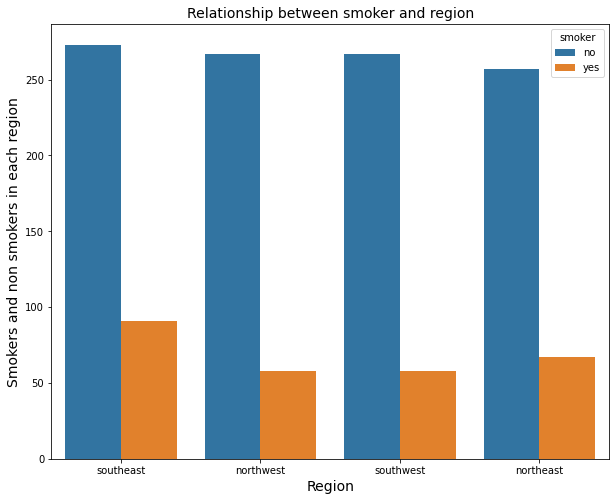

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="region", y="distribution", hue="smoker", data=new_smoker_region)
plt.ylabel("Smokers and non smokers in each region", size=14)
plt.xlabel("Region", size=14)
plt.title("Relationship between smoker and region", size=14)

RELATIONSHIP BETWEEN BMI AND SEX

---



In [199]:
sex = df['sex']
bmi_sex = pd.concat([bmi, sex], axis=1)
bmi_sex

,bmi,sex
0,27.900,female
1,33.770,male
2,33.000,male
3,22.705,male
4,28.880,male
...,...,...
1333,30.970,male
1334,31.920,female
1335,36.850,female
1336,25.800,female


Text(0.5, 1.0, 'Relationship between bmi and sex')

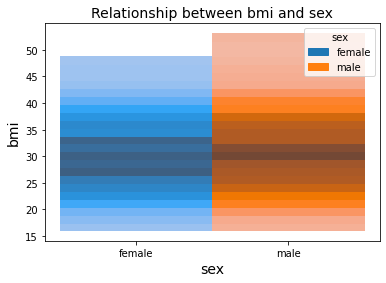

In [186]:
sns.histplot(data=bmi_sex, x=sex, y=bmi, hue=sex)
plt.ylabel("bmi", size=14)
plt.xlabel("sex", size=14)
plt.title("Relationship between bmi and sex", size=14)

In [202]:
children = df['children']
children_region = pd.concat([region, children], axis=1)

REGION WITH THE MOST CHILDREN

---



In [209]:
new_children_region = pd.DataFrame(children_region.value_counts())
new_children_region = new_children_region.rename(columns={0:'children_distribution'},)
new_children_region.reset_index(inplace=True)
new_children_region

,region,children,children_distribution
0,southeast,0,157
1,northeast,0,147
2,southwest,0,138
3,northwest,0,132
4,southeast,1,95
5,southwest,1,78
6,northeast,1,77
7,northwest,1,74
8,northwest,2,66
9,southeast,2,66


Text(0.5, 1.0, 'Relationship between children and region')

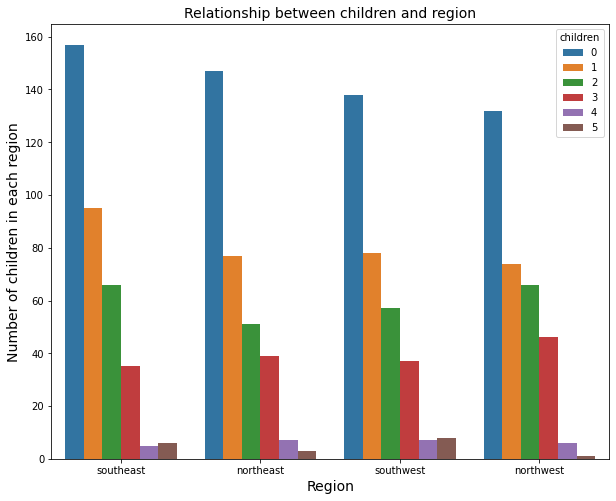

In [211]:
plt.figure(figsize=(10, 8))
sns.barplot(x="region", y="children_distribution", hue="children", data=new_children_region)
plt.ylabel("Number of children in each region", size=14)
plt.xlabel("Region", size=14)
plt.title("Relationship between children and region", size=14)